In [104]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mutual-funds-india-detailed/comprehensive_mutual_funds_data.csv


In [105]:
mutual_fund_data = pd.read_csv("/kaggle/input/mutual-funds-india-detailed/comprehensive_mutual_funds_data.csv")

In [106]:
# df = Data frame where i create the copy of original datases

df = mutual_fund_data.copy()

# Data fields:

* Scheme Name: Name of the mutual fund scheme
* Min sip: Min sip amount required to start.
* Min lumpsum: Min lumpsum amount required to start.
* Expense ratio: calculated as a percentage of the Scheme's average Net Asset Value (NAV).
* Fund size: the total amount of money that a mutual fund manager must oversee and invest.
* Fund age: years since inception of scheme
* Fund manager: A fund manager is responsible for implementing a fund's investment strategy and managing its trading activities.
* Sortino : Sortino ratio measures the risk-adjusted return of an investment asset, portfolio, or strategy
* Alpha: Alpha is the excess returns relative to market benchmark for a given amount of risk taken by the scheme
* Standard deviation: A standard deviation is a number that can be used to show how much the returns of a mutual fund scheme are likely to deviate from its average annual returns.
* Beta: Beta in a mutual fund is often used to convey the fund's volatility (gains or losses) in relation to its respective benchmark index
* Sharpe: Sharpe Ratio of a mutual fund reveals its potential risk-adjusted returns
* Risk level:
1- Low risk
2- Low to moderate
3- Moderate
4- Moderately High
5- High
6- Very High
* AMC name: Mutual fund house managing the assets.
* Rating: 0-5 rating assigned to scheme
* Category: The category to which the mutual fund belongs (e.g. equity, debt, hybrid)
* Sub-category : It includes category like Small cap, Large cap, ELSS, etc.
* Return_1yr (%): The return percentage of the mutual fund scheme over 1 year.
* Return_3yr (%): The return percentage of the mutual fund scheme over 3 year.
* Return_5yr (%): The return percentage of the mutual fund scheme over 5year.

* Number of instances: The dataset contains data on hundreds of mutual funds available in India.
* Data source: The dataset was created by web scraping data from online websites

Disclaimer: The dataset is for educational and research purposes only. The data may not be 100% accurate and users should verify the data before making any investment decisions.

In [107]:
df.sample(3)

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
435,Kotak Credit Risk Fund,1000,5000,0.74,1204.0,10,Deepak Agrawal,0.42,0.82,2.92,-0.4,0.47,5,Kotak Mahindra Mutual Fund,2,Debt,Credit Risk Funds,1.6,5.9,6.4
225,HDFC Capital Builder Value Fund,100,100,1.04,5227.0,10,Gopal Agrawal,3.26,3.69,16.41,0.95,1.53,6,HDFC Mutual Fund,2,Equity,Value Funds,-0.7,33.7,11.3
744,Tata Young Citizens Fund,500,500,1.80,257.0,10,Amey Sathe,2.85,1.44,15.49,0.9,1.46,6,Tata Mutual Fund,0,Solution Oriented,Childrens Funds,1.5,27.3,10.3


# Data Processing

In [108]:
df.columns = df.columns.str.title()

df.columns

Index(['Scheme_Name', 'Min_Sip', 'Min_Lumpsum', 'Expense_Ratio',
       'Fund_Size_Cr', 'Fund_Age_Yr', 'Fund_Manager', 'Sortino', 'Alpha', 'Sd',
       'Beta', 'Sharpe', 'Risk_Level', 'Amc_Name', 'Rating', 'Category',
       'Sub_Category', 'Returns_1Yr', 'Returns_3Yr', 'Returns_5Yr'],
      dtype='object')

In [109]:
df.shape

(814, 20)

In [110]:
null_col = df.isnull().sum()
null_col = null_col.loc[null_col.values > 0].reset_index()
null_col

,index,0
0,Returns_3Yr,21
1,Returns_5Yr,167


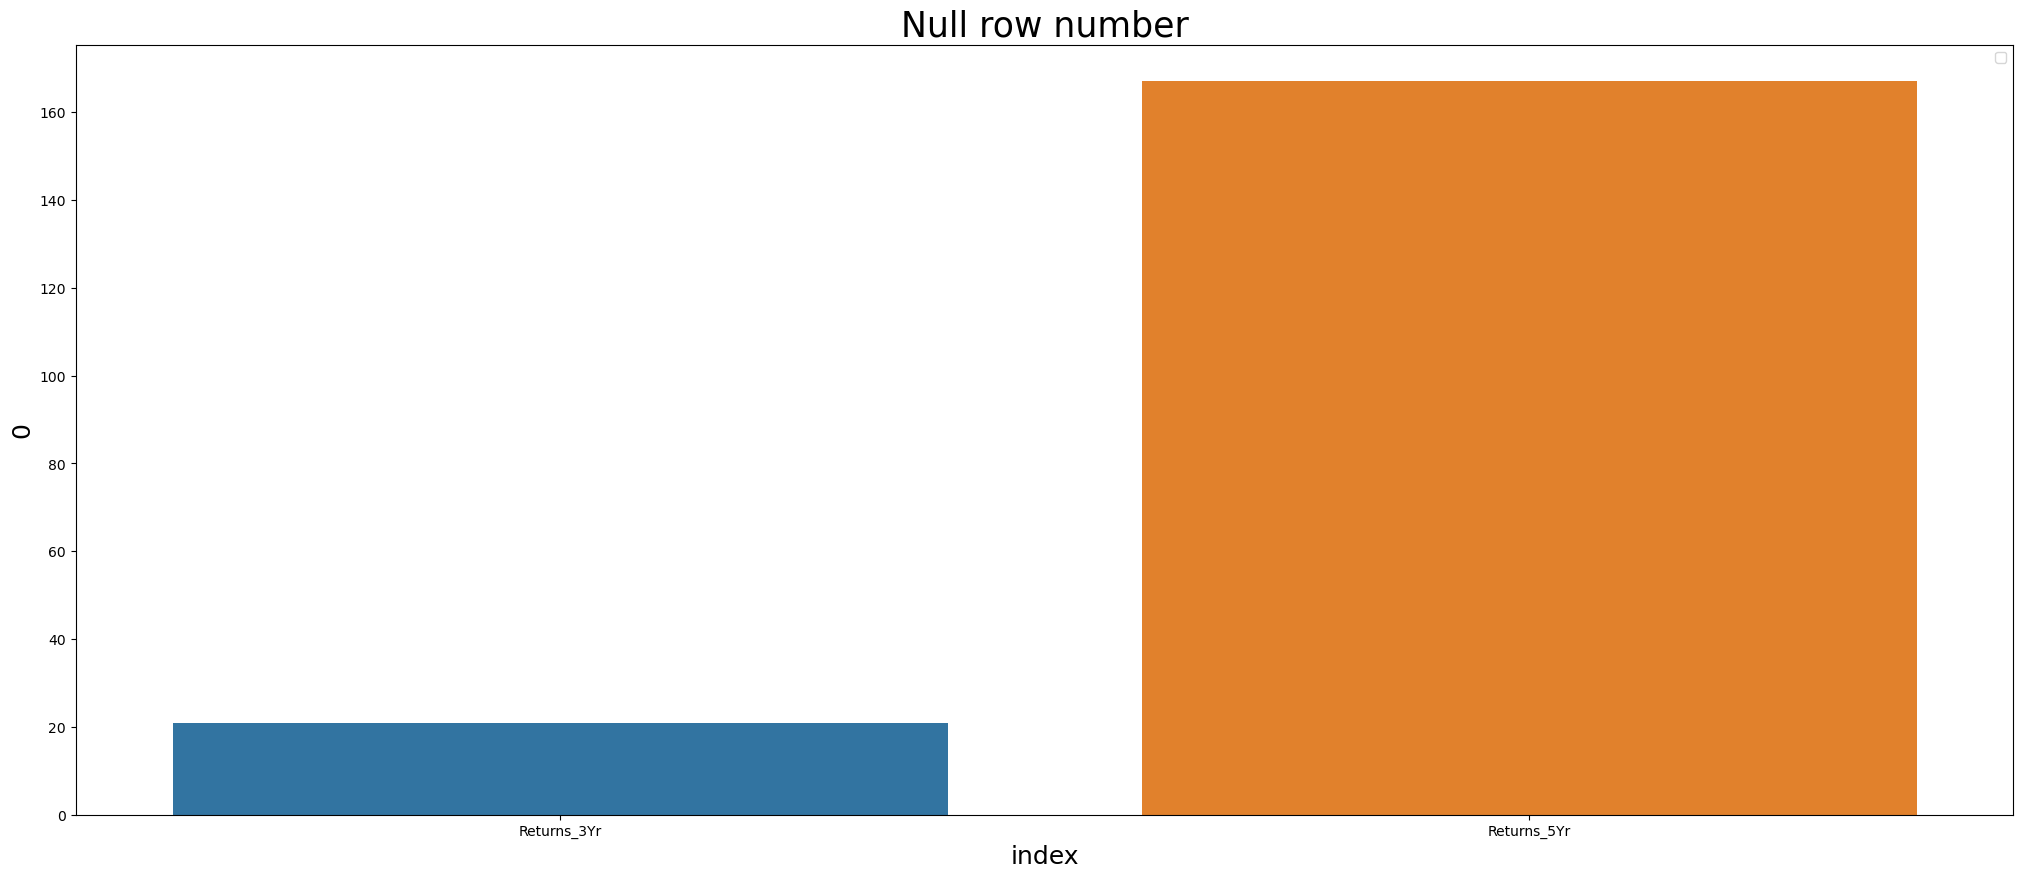

In [111]:
plt.figure(figsize=(25,10))

plt.title("Null row number", fontsize=25)
plt.xlabel("Columns", fontsize=18)
plt.ylabel("Count", fontsize=18)

sns.barplot(data = null_col, x='index', y=0)
plt.legend()

In [112]:
plt.figure(figsize=(25,10))
def create_null_graph():

    
    plt.title('Checking the Null Values')

    return sns.heatmap(df.isnull())

<Figure size 2500x1000 with 0 Axes>

<Axes: title={'center': 'Checking the Null Values'}>

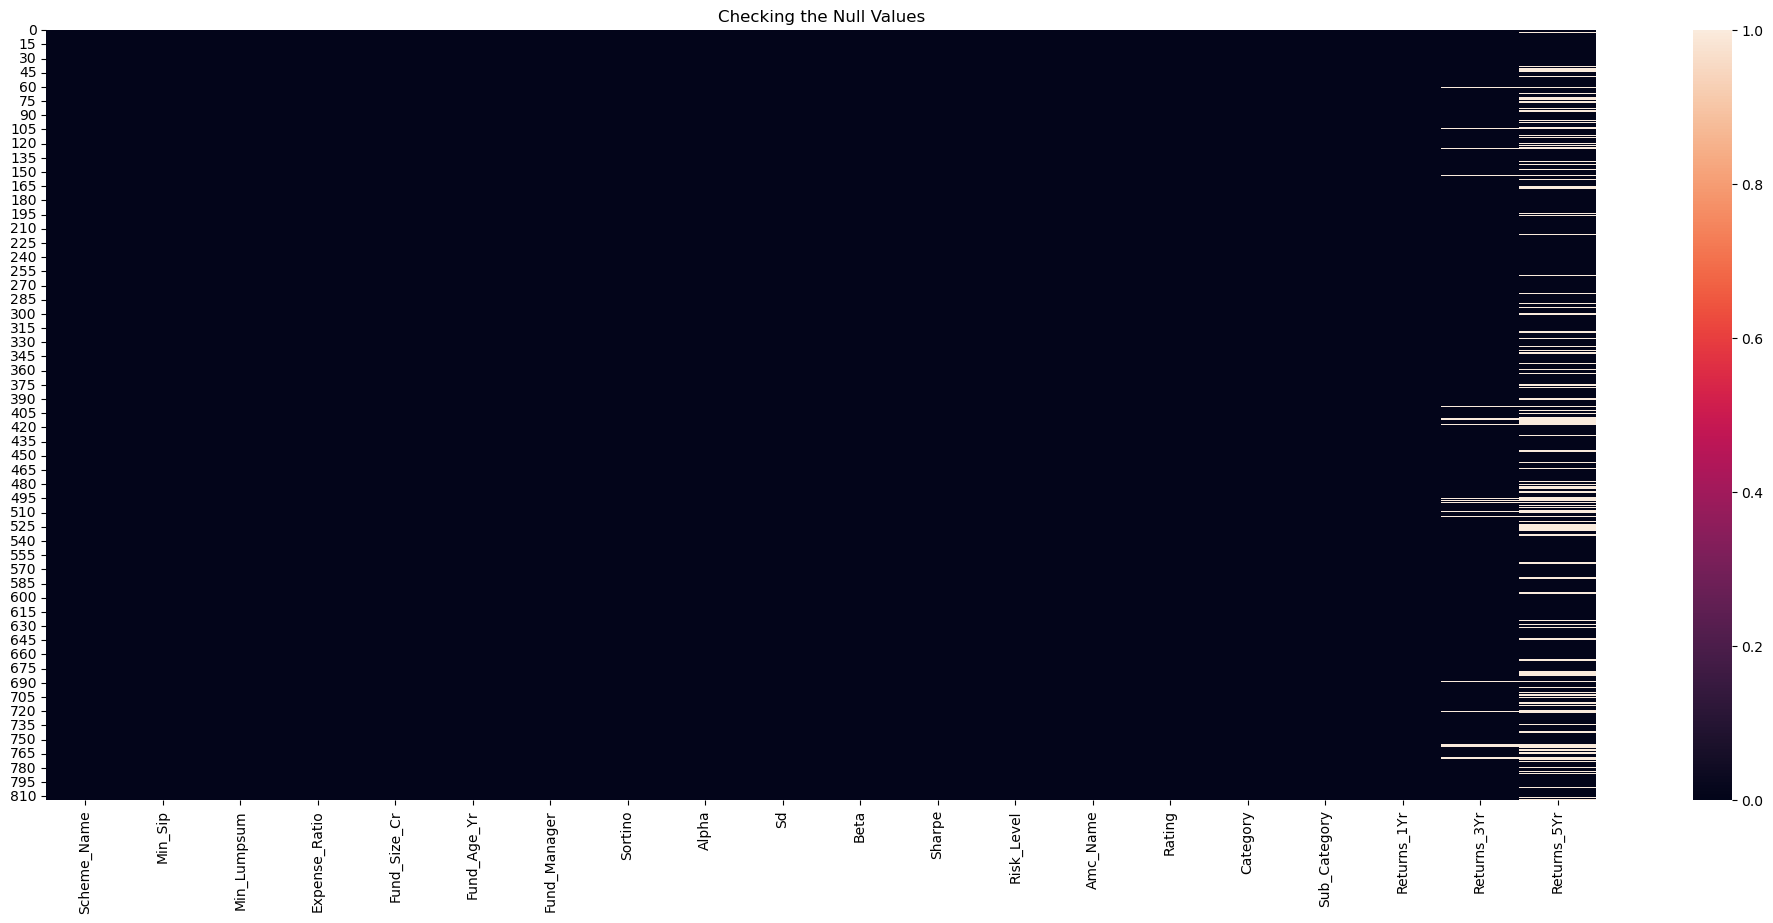

In [113]:
plt.figure(figsize=(25,10))
create_null_graph()

# Result:

* There is only 2 Columns which are Return_3Y and Return_5Y have null values.

In [114]:
df['Returns_3Yr'] = df['Returns_3Yr'].fillna(0)
df['Returns_5Yr'] = df['Returns_5Yr'].fillna(0)

In [115]:
df.isnull().sum()

Scheme_Name      0
Min_Sip          0
Min_Lumpsum      0
Expense_Ratio    0
Fund_Size_Cr     0
Fund_Age_Yr      0
Fund_Manager     0
Sortino          0
Alpha            0
Sd               0
Beta             0
Sharpe           0
Risk_Level       0
Amc_Name         0
Rating           0
Category         0
Sub_Category     0
Returns_1Yr      0
Returns_3Yr      0
Returns_5Yr      0
dtype: int64

<Axes: title={'center': 'Checking the Null Values'}>

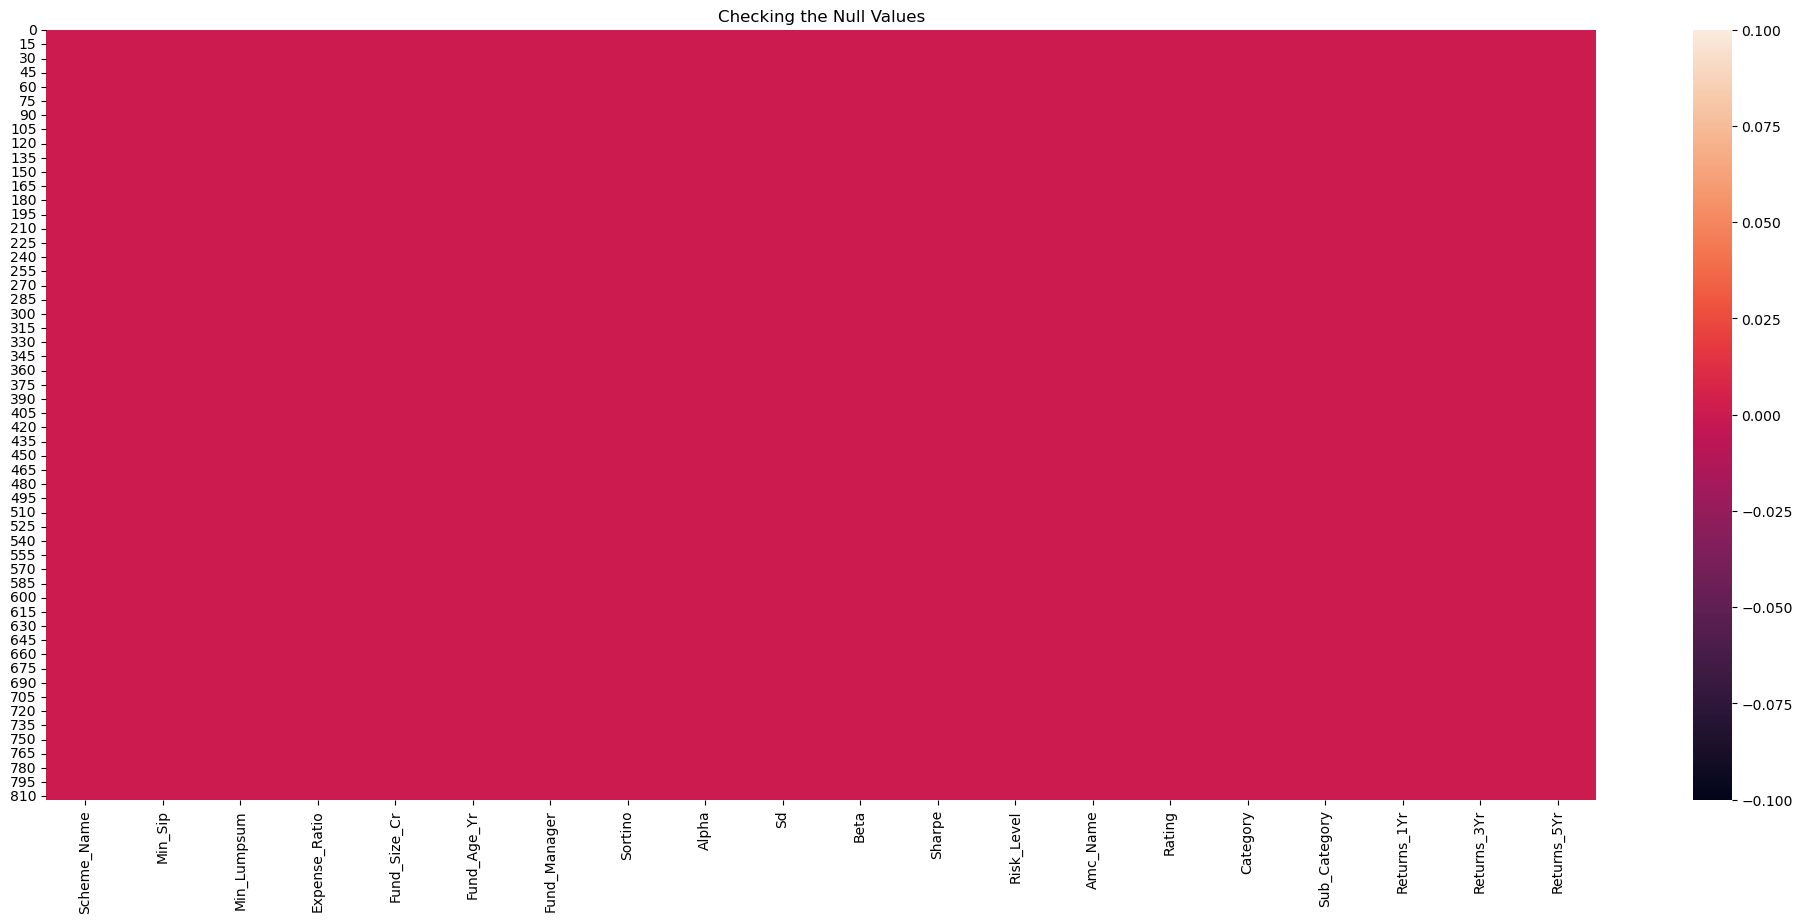

In [116]:
plt.figure(figsize=(25,10))
create_null_graph()

* Now, The Datasets has been cleaned.

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Scheme_Name    814 non-null    object 
 1   Min_Sip        814 non-null    int64  
 2   Min_Lumpsum    814 non-null    int64  
 3   Expense_Ratio  814 non-null    float64
 4   Fund_Size_Cr   814 non-null    float64
 5   Fund_Age_Yr    814 non-null    int64  
 6   Fund_Manager   814 non-null    object 
 7   Sortino        814 non-null    object 
 8   Alpha          814 non-null    object 
 9   Sd             814 non-null    object 
 10  Beta           814 non-null    object 
 11  Sharpe         814 non-null    object 
 12  Risk_Level     814 non-null    int64  
 13  Amc_Name       814 non-null    object 
 14  Rating         814 non-null    int64  
 15  Category       814 non-null    object 
 16  Sub_Category   814 non-null    object 
 17  Returns_1Yr    814 non-null    float64
 18  Returns_3Y

In [118]:
df = df.drop(columns=['Sortino', 'Alpha', 'Sd','Beta','Sharpe'], axis=1)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Scheme_Name    814 non-null    object 
 1   Min_Sip        814 non-null    int64  
 2   Min_Lumpsum    814 non-null    int64  
 3   Expense_Ratio  814 non-null    float64
 4   Fund_Size_Cr   814 non-null    float64
 5   Fund_Age_Yr    814 non-null    int64  
 6   Fund_Manager   814 non-null    object 
 7   Risk_Level     814 non-null    int64  
 8   Amc_Name       814 non-null    object 
 9   Rating         814 non-null    int64  
 10  Category       814 non-null    object 
 11  Sub_Category   814 non-null    object 
 12  Returns_1Yr    814 non-null    float64
 13  Returns_3Yr    814 non-null    float64
 14  Returns_5Yr    814 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 95.5+ KB


In [120]:
data_type = df.dtypes.value_counts()
data_type

object     5
int64      5
float64    5
dtype: int64

<Axes: title={'center': 'Check Columns DataTypes'}, xlabel='DataTypes', ylabel='Count'>

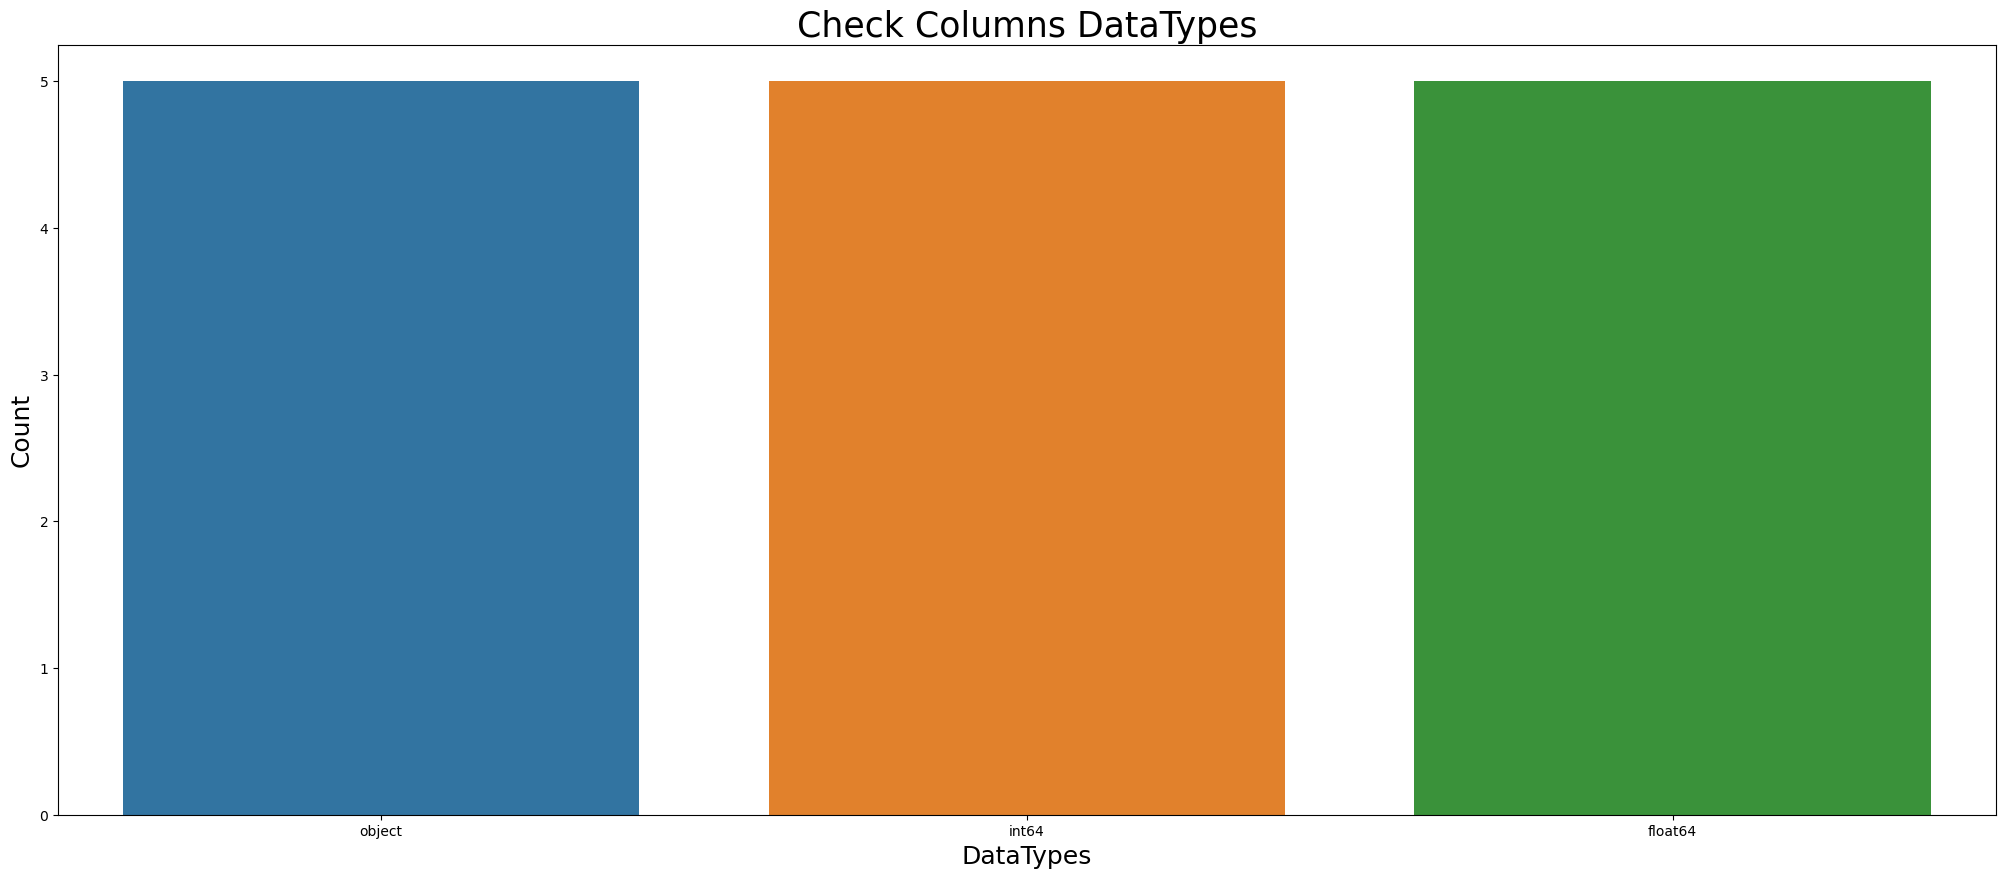

In [121]:
plt.figure(figsize=(25,10))
plt.title("Check Columns DataTypes", fontsize= 25)
plt.xlabel("DataTypes", fontsize= 18)
plt.ylabel("Count", fontsize= 18)


sns.barplot(x=data_type.index, y=data_type.values)

In [122]:
df.sample(5)

,Scheme_Name,Min_Sip,Min_Lumpsum,Expense_Ratio,Fund_Size_Cr,Fund_Age_Yr,Fund_Manager,Risk_Level,Amc_Name,Rating,Category,Sub_Category,Returns_1Yr,Returns_3Yr,Returns_5Yr
364,IDBI Midcap Fund,500,5000,1.62,176.0,6,Alok Ranjan,6,IDBI Mutual Fund,1,Equity,Mid Cap Mutual Funds,-2.9,25.1,7.7
781,UTI-Credit Risk Fund,500,500,0.81,438.0,10,Ritesh Nambiar,4,UTI Mutual Fund,4,Debt,Credit Risk Funds,5.0,8.3,-0.9
266,HSBC Conservative Hybrid Fund,500,5000,1.34,122.0,10,Ritesh Jain,4,HSBC Mutual Fund,3,Hybrid,Conservative Hybrid Mutual Funds,2.3,10.3,7.5
808,UTI-Ultra Short Term Fund,500,500,0.44,2130.0,10,Ritesh Nambiar,3,UTI Mutual Fund,5,Debt,Ultra Short Duration Funds,5.4,6.1,5.7
130,Canara Robeco Dynamic Bond Fund,1000,5000,0.66,116.0,10,Kunal Jain,3,Canara Robeco Mutual Fund,3,Debt,Dynamic Bond,4.7,5.3,6.6


# EDA Analysis:

# Categorization Analysis:

* Explore the performance of different fund categories (Equity, Debt, Hybrid) and sub-categories (Small Cap, Medium Duration, etc.).
* Identify which categories have shown the best and worst returns.

In [123]:
df.columns

Index(['Scheme_Name', 'Min_Sip', 'Min_Lumpsum', 'Expense_Ratio',
       'Fund_Size_Cr', 'Fund_Age_Yr', 'Fund_Manager', 'Risk_Level', 'Amc_Name',
       'Rating', 'Category', 'Sub_Category', 'Returns_1Yr', 'Returns_3Yr',
       'Returns_5Yr'],
      dtype='object')

<Axes: title={'center': 'Categorization Analysis'}, xlabel='Category', ylabel='count'>

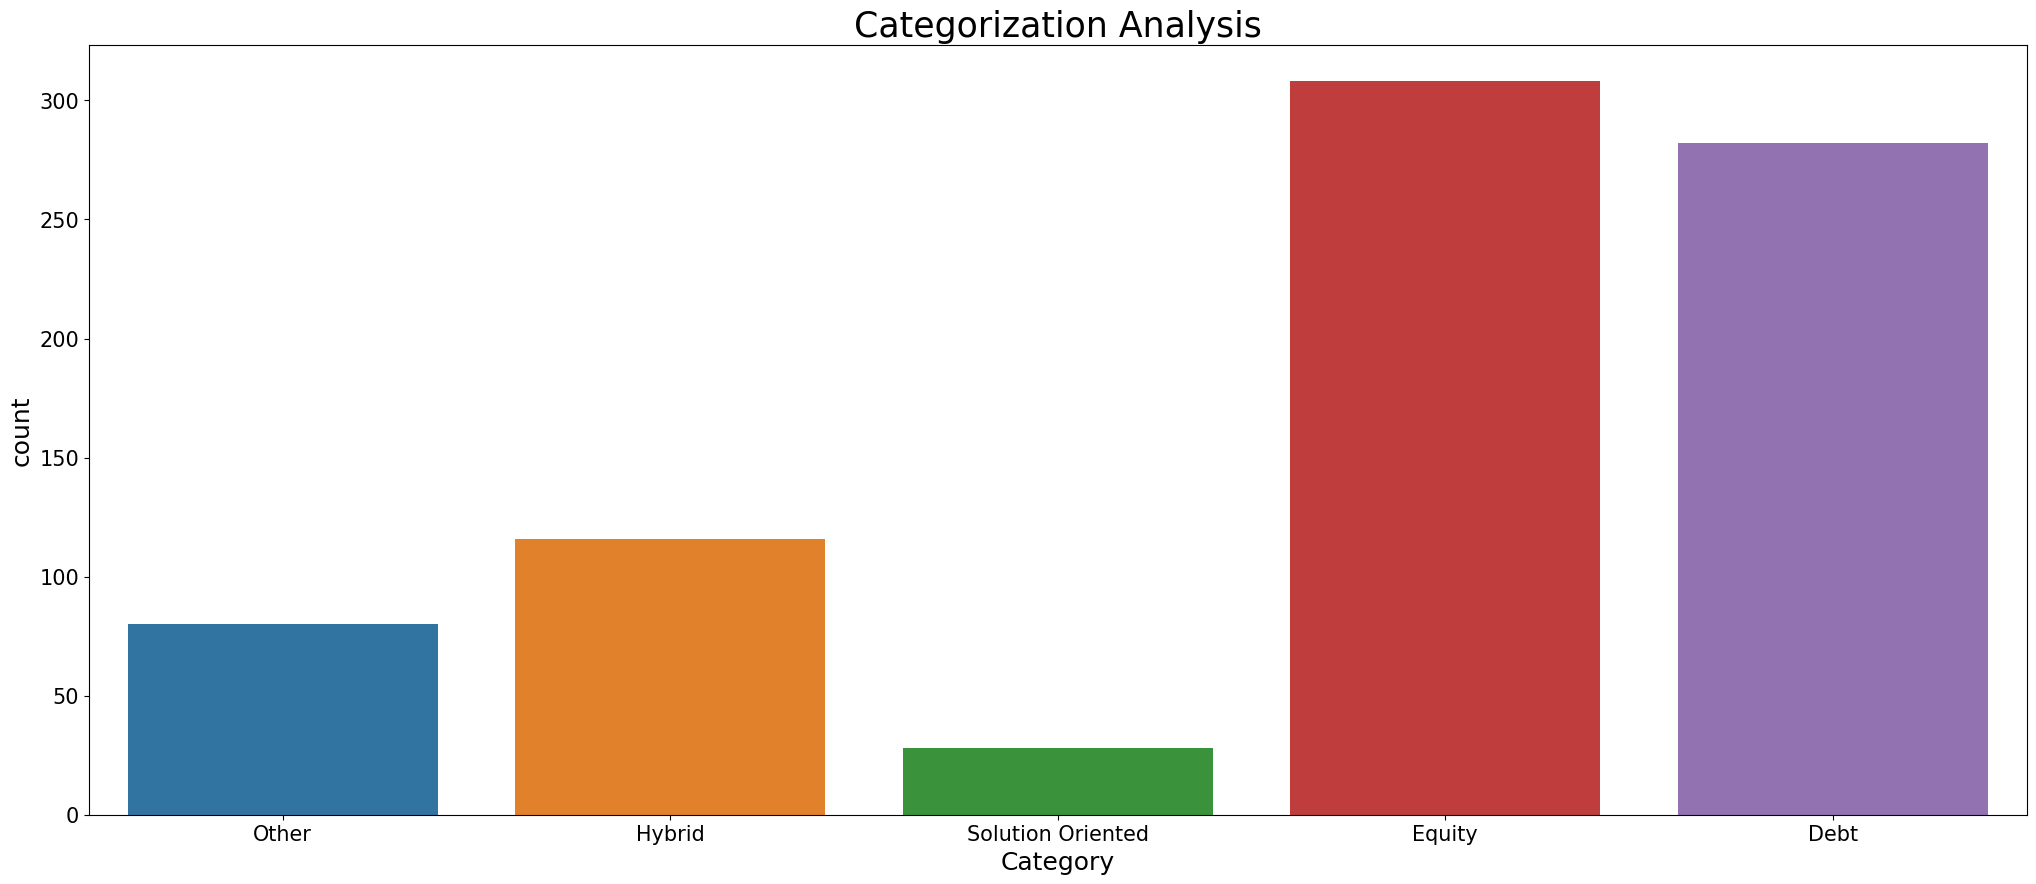

In [124]:
plt.figure(figsize=(25,10))
plt.title("Categorization Analysis", fontsize=25)
plt.xlabel('d', fontsize=18)
plt.ylabel('d', fontsize=18)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)


sns.countplot(x=df['Category'])

<Axes: title={'center': 'Sub_Category'}, xlabel='Sub_Category', ylabel='count'>

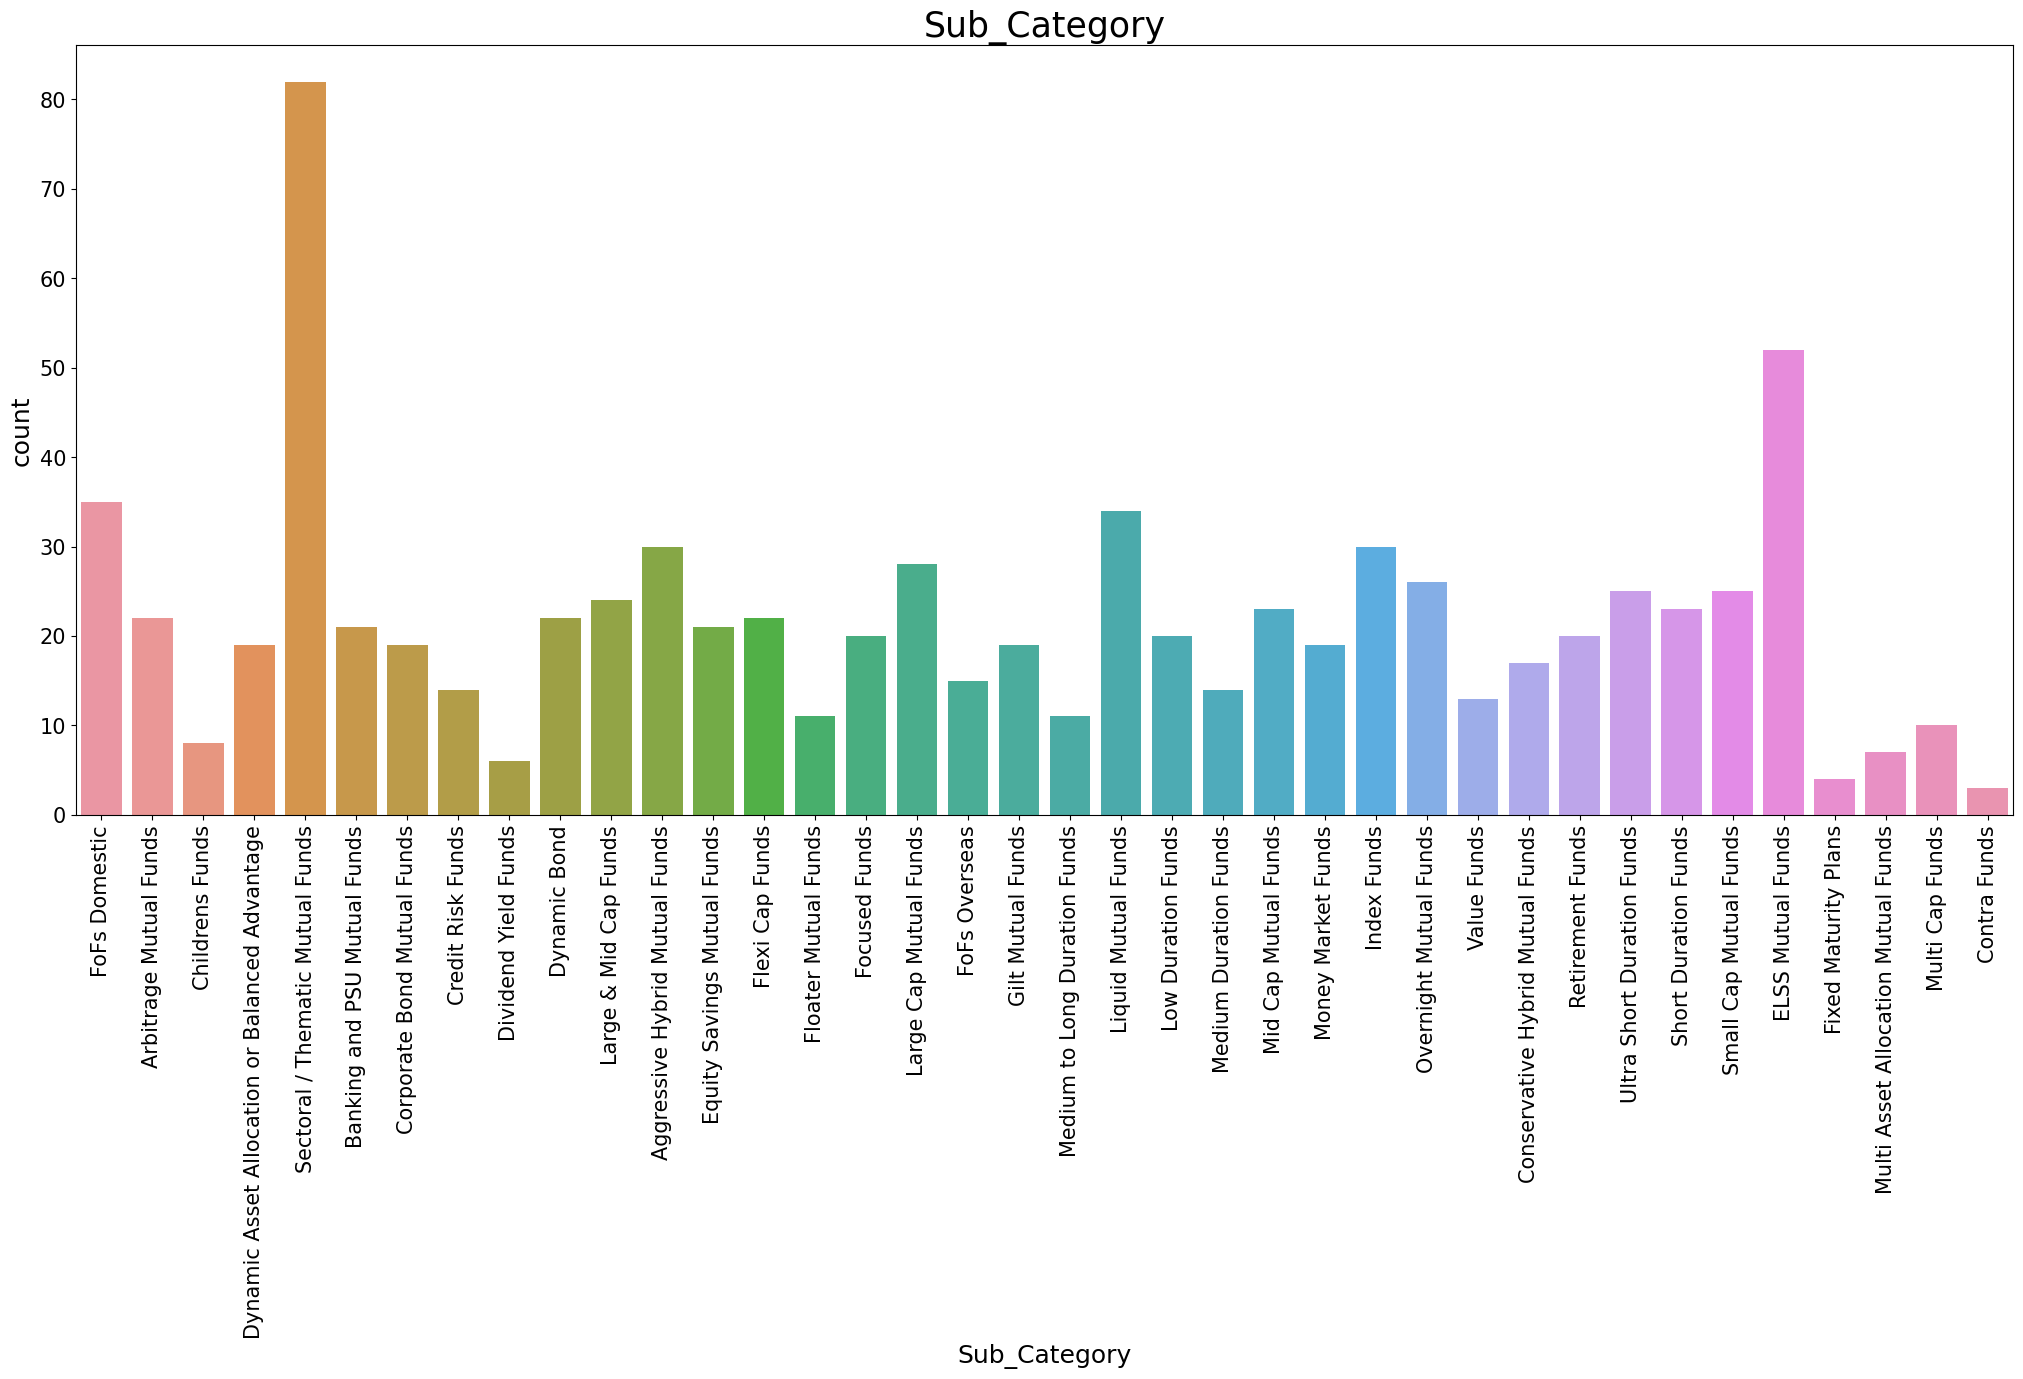

In [125]:
plt.figure(figsize=(25,10))
plt.title("Sub_Category", fontsize=25)
plt.xlabel(' ', fontsize=18)
plt.ylabel(' ', fontsize=18)
plt.xticks( rotation=90, fontsize=15)
plt.yticks( fontsize=15)


sns.countplot(x=df['Sub_Category'])

# Average fund returns

In [126]:
year_1 = df.groupby('Category')['Returns_1Yr'].mean()
year_3 = df.groupby('Category')['Returns_3Yr'].mean()
year_5 = df.groupby('Category')['Returns_5Yr'].mean()

In [127]:
year_1

Category
Debt                 5.547872
Equity               2.842532
Hybrid               4.075000
Other                2.891250
Solution Oriented    1.714286
Name: Returns_1Yr, dtype: float64

In [128]:
year_3

Category
Debt                  5.808865
Equity               29.641558
Hybrid               15.272414
Other                20.532500
Solution Oriented    18.167857
Name: Returns_3Yr, dtype: float64

In [129]:
year_5

Category
Debt                  4.823050
Equity               10.110390
Hybrid                7.027586
Other                 8.568750
Solution Oriented     5.917857
Name: Returns_5Yr, dtype: float64

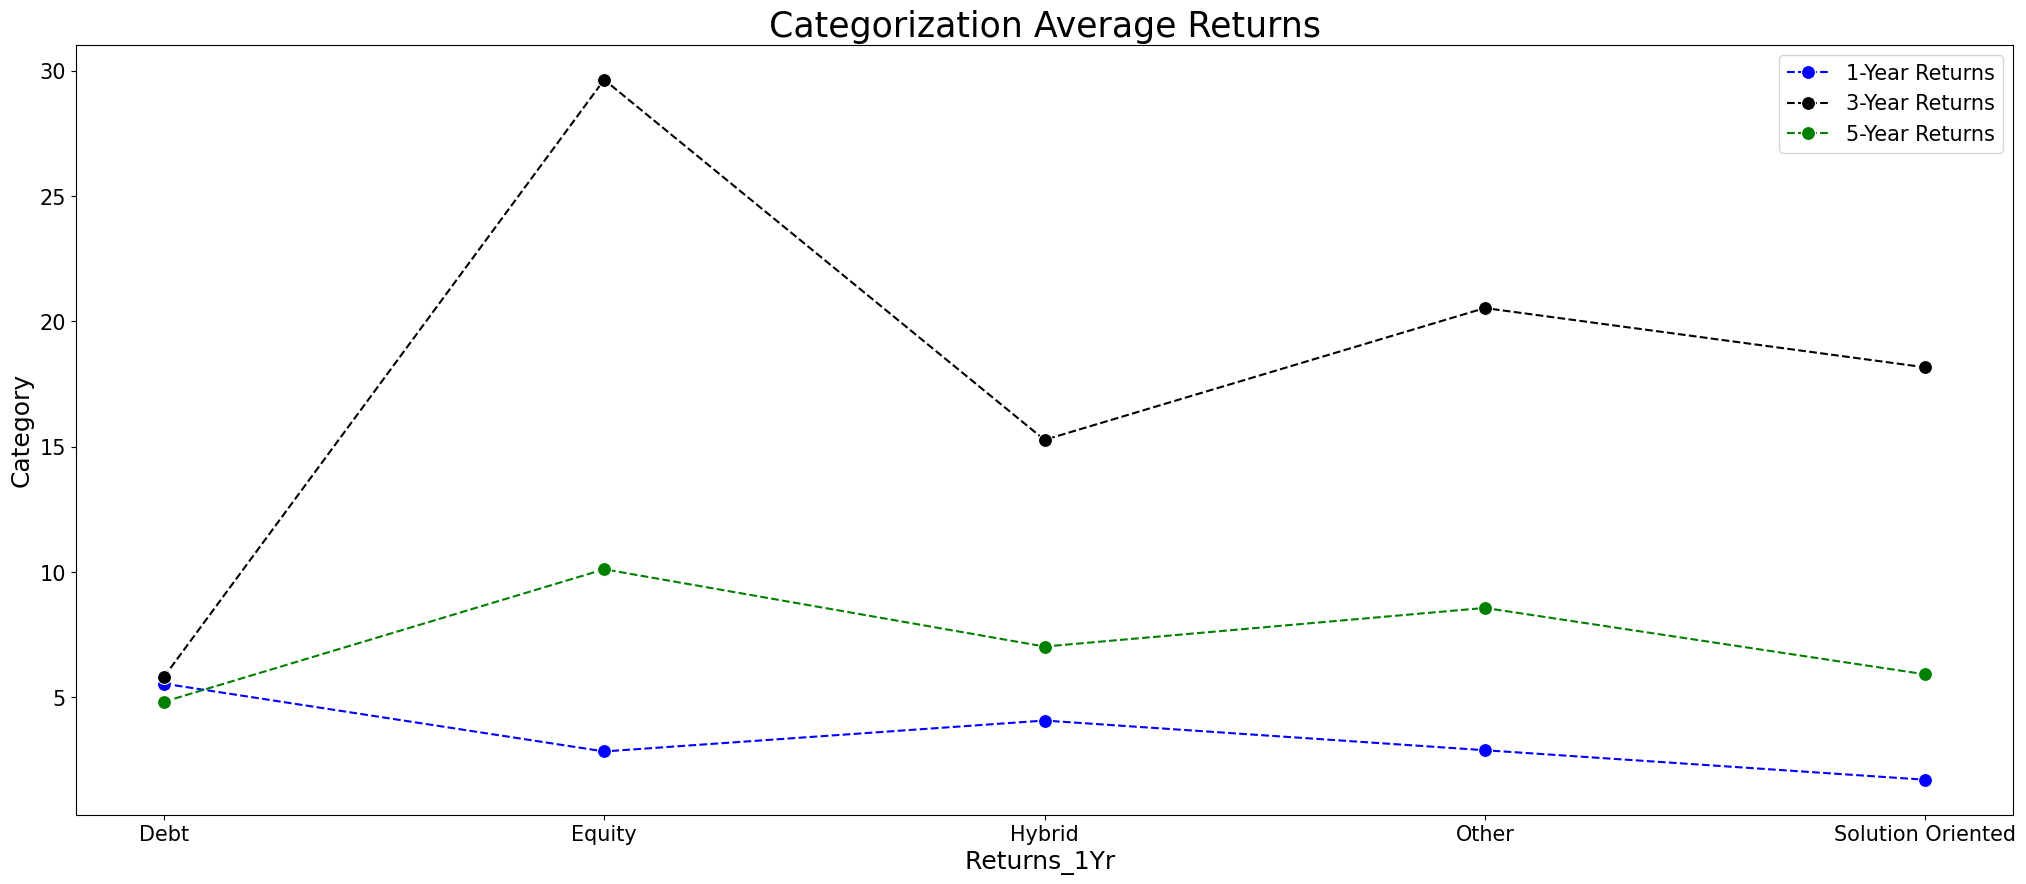

In [130]:
plt.figure(figsize=(25,10))
plt.title("Categorization Average Returns", fontsize=25)
plt.xlabel('Returns_1Yr ', fontsize=18)
plt.ylabel('Category', fontsize=18)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)


sns.lineplot(x=year_1.index,y=year_1.values,label='1-Year Returns', color='b', marker='o', linestyle='--', markersize=10)
sns.lineplot(x=year_3.index,y=year_3.values,label='3-Year Returns', color='black', marker='o', linestyle='--', markersize=10)
sns.lineplot(x=year_5.index,y=year_5.values,label='5-Year Returns', color='g', marker='o', linestyle='--', markersize=10)


plt.legend(fontsize=15)

# Result:
* for 1 year Debt and Hybrid fund perfomance well.
* for 3 year Equity fund perfomance would be great.
Similarly,
* for 5 year Equity fund perfomance would be great but all are okay in the term of returns.

In [131]:
year_1df = df.groupby('Sub_Category')['Returns_1Yr'].mean()
year_3df = df.groupby('Sub_Category')['Returns_3Yr'].mean()
year_5df = df.groupby('Sub_Category')['Returns_5Yr'].mean()

In [132]:
year_1df

Sub_Category
Aggressive Hybrid Mutual Funds                     2.450000
Arbitrage Mutual Funds                             5.363636
Banking and PSU Mutual Funds                       4.257143
Childrens Funds                                    0.462500
Conservative Hybrid Mutual Funds                   5.247059
Contra Funds                                       8.366667
Corporate Bond Mutual Funds                        3.984211
Credit Risk Funds                                 14.421429
Dividend Yield Funds                               4.133333
Dynamic Asset Allocation or Balanced Advantage     4.342105
Dynamic Bond                                       4.727273
ELSS Mutual Funds                                  1.426923
Equity Savings Mutual Funds                        3.561905
Fixed Maturity Plans                               7.900000
Flexi Cap Funds                                    0.286364
Floater Mutual Funds                               5.318182
FoFs Domestic              

In [133]:
year_3df

Sub_Category
Aggressive Hybrid Mutual Funds                    23.223333
Arbitrage Mutual Funds                             4.418182
Banking and PSU Mutual Funds                       5.228571
Childrens Funds                                   20.650000
Conservative Hybrid Mutual Funds                  11.511765
Contra Funds                                      33.566667
Corporate Bond Mutual Funds                        7.542105
Credit Risk Funds                                  8.328571
Dividend Yield Funds                              30.700000
Dynamic Asset Allocation or Balanced Advantage    16.036842
Dynamic Bond                                       7.045455
ELSS Mutual Funds                                 29.517308
Equity Savings Mutual Funds                       14.147619
Fixed Maturity Plans                              10.350000
Flexi Cap Funds                                   26.363636
Floater Mutual Funds                               4.118182
FoFs Domestic              

In [134]:
year_5df

Sub_Category
Aggressive Hybrid Mutual Funds                     9.126667
Arbitrage Mutual Funds                             4.036364
Banking and PSU Mutual Funds                       5.300000
Childrens Funds                                    8.512500
Conservative Hybrid Mutual Funds                   7.341176
Contra Funds                                      14.033333
Corporate Bond Mutual Funds                        5.447368
Credit Risk Funds                                  4.785714
Dividend Yield Funds                               9.933333
Dynamic Asset Allocation or Balanced Advantage     6.373684
Dynamic Bond                                       6.245455
ELSS Mutual Funds                                 10.188462
Equity Savings Mutual Funds                        5.771429
Fixed Maturity Plans                               7.000000
Flexi Cap Funds                                   10.363636
Floater Mutual Funds                               3.109091
FoFs Domestic              

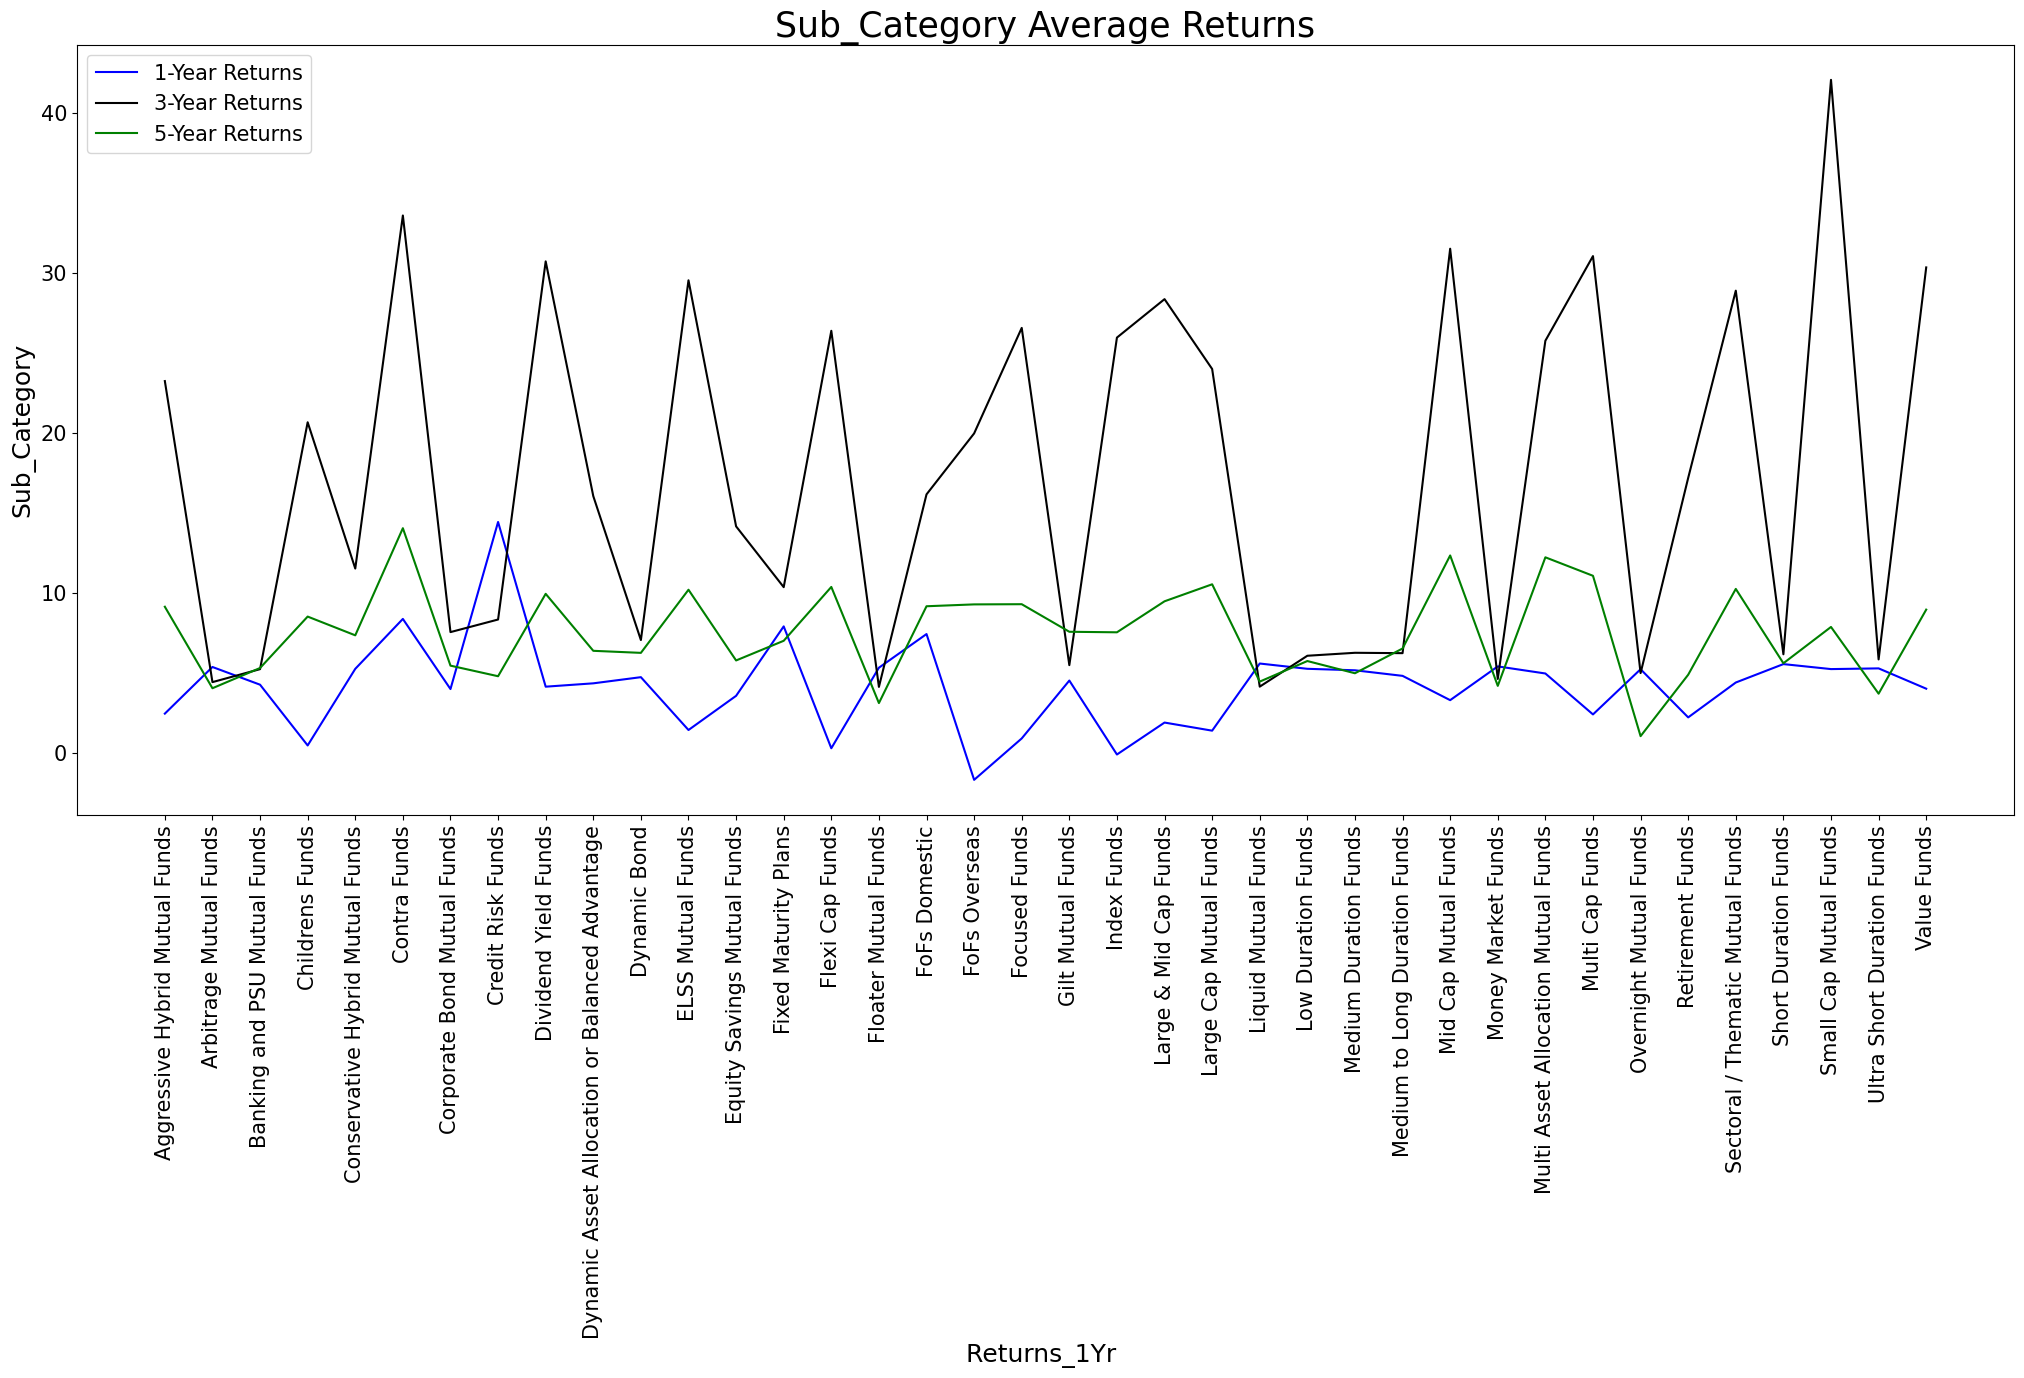

In [135]:
plt.figure(figsize=(25,10))
plt.title("Sub_Category Average Returns", fontsize=25)
plt.xlabel('Returns_1Yr ', fontsize=18)
plt.ylabel('Sub_Category', fontsize=18)
plt.xticks( rotation=90, fontsize=15)
plt.yticks( fontsize=15)


sns.lineplot(x=year_1df.index,y=year_1df.values,label='1-Year Returns', color='b')
sns.lineplot(x=year_3df.index,y=year_3df.values,label='3-Year Returns', color='black')
sns.lineplot(x=year_5df.index,y=year_5df.values,label='5-Year Returns', color='g')


plt.legend(fontsize=15)

# Worst fund return 

In [136]:
min_year_1 = df.groupby('Category')['Returns_1Yr'].min()
min_year_3 = df.groupby('Category')['Returns_3Yr'].min()
min_year_5 = df.groupby('Category')['Returns_5Yr'].min()

In [137]:
min_year_1

Category
Debt                  1.6
Equity              -19.7
Hybrid               -5.7
Other               -12.1
Solution Oriented    -6.5
Name: Returns_1Yr, dtype: float64

In [138]:
min_year_3

Category
Debt                 0.0
Equity               0.0
Hybrid               3.3
Other                0.0
Solution Oriented    4.6
Name: Returns_3Yr, dtype: float64

In [139]:
min_year_5

Category
Debt                -4.1
Equity               0.0
Hybrid               0.0
Other                0.0
Solution Oriented    0.0
Name: Returns_5Yr, dtype: float64

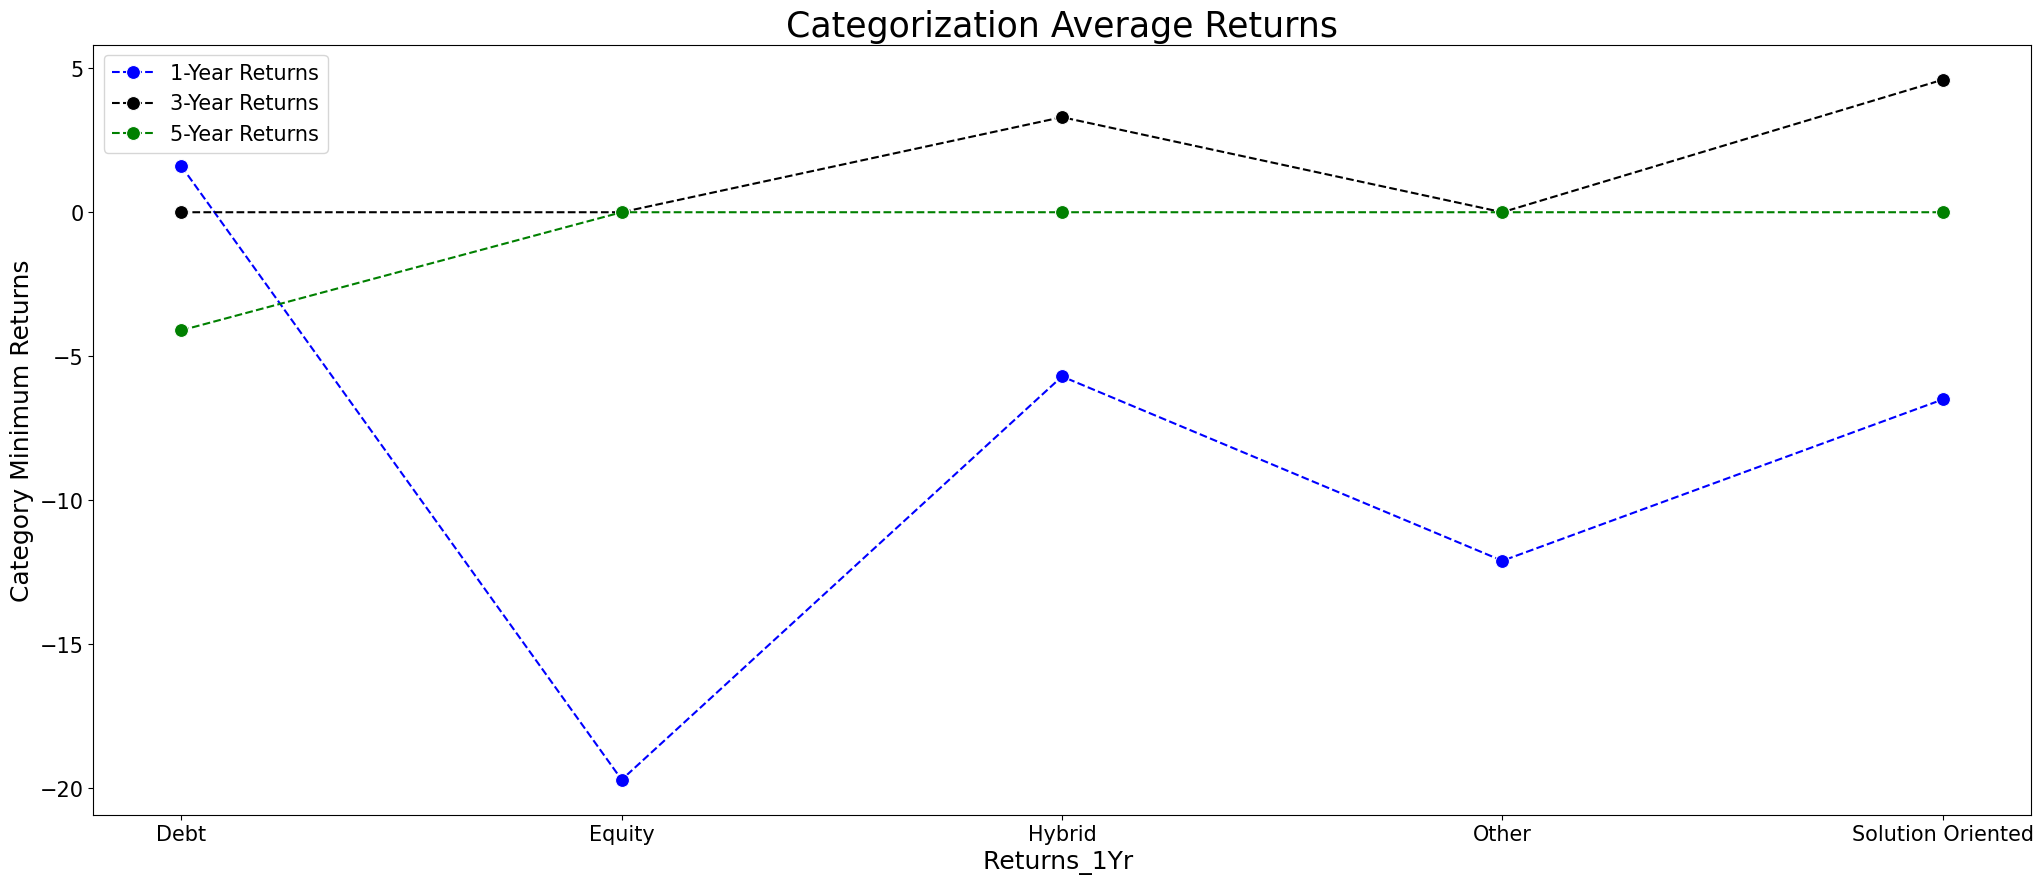

In [140]:
plt.figure(figsize=(25,10))
plt.title("Categorization Average Returns", fontsize=25)
plt.xlabel('Returns_1Yr ', fontsize=18)
plt.ylabel('Category Minimum Returns', fontsize=18)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)


sns.lineplot(x=min_year_1.index,y=min_year_1.values,label='1-Year Returns', color='b', marker='o', linestyle='--', markersize=10)
sns.lineplot(x=min_year_3.index,y=min_year_3.values,label='3-Year Returns', color='black', marker='o', linestyle='--', markersize=10)
sns.lineplot(x=min_year_5.index,y=min_year_5.values,label='5-Year Returns', color='g', marker='o', linestyle='--', markersize=10)


plt.legend(fontsize=15)

In [141]:
min_year_1df = df.groupby('Sub_Category')['Returns_1Yr'].min()
min_year_3df = df.groupby('Sub_Category')['Returns_3Yr'].min()
min_year_5df = df.groupby('Sub_Category')['Returns_5Yr'].min()

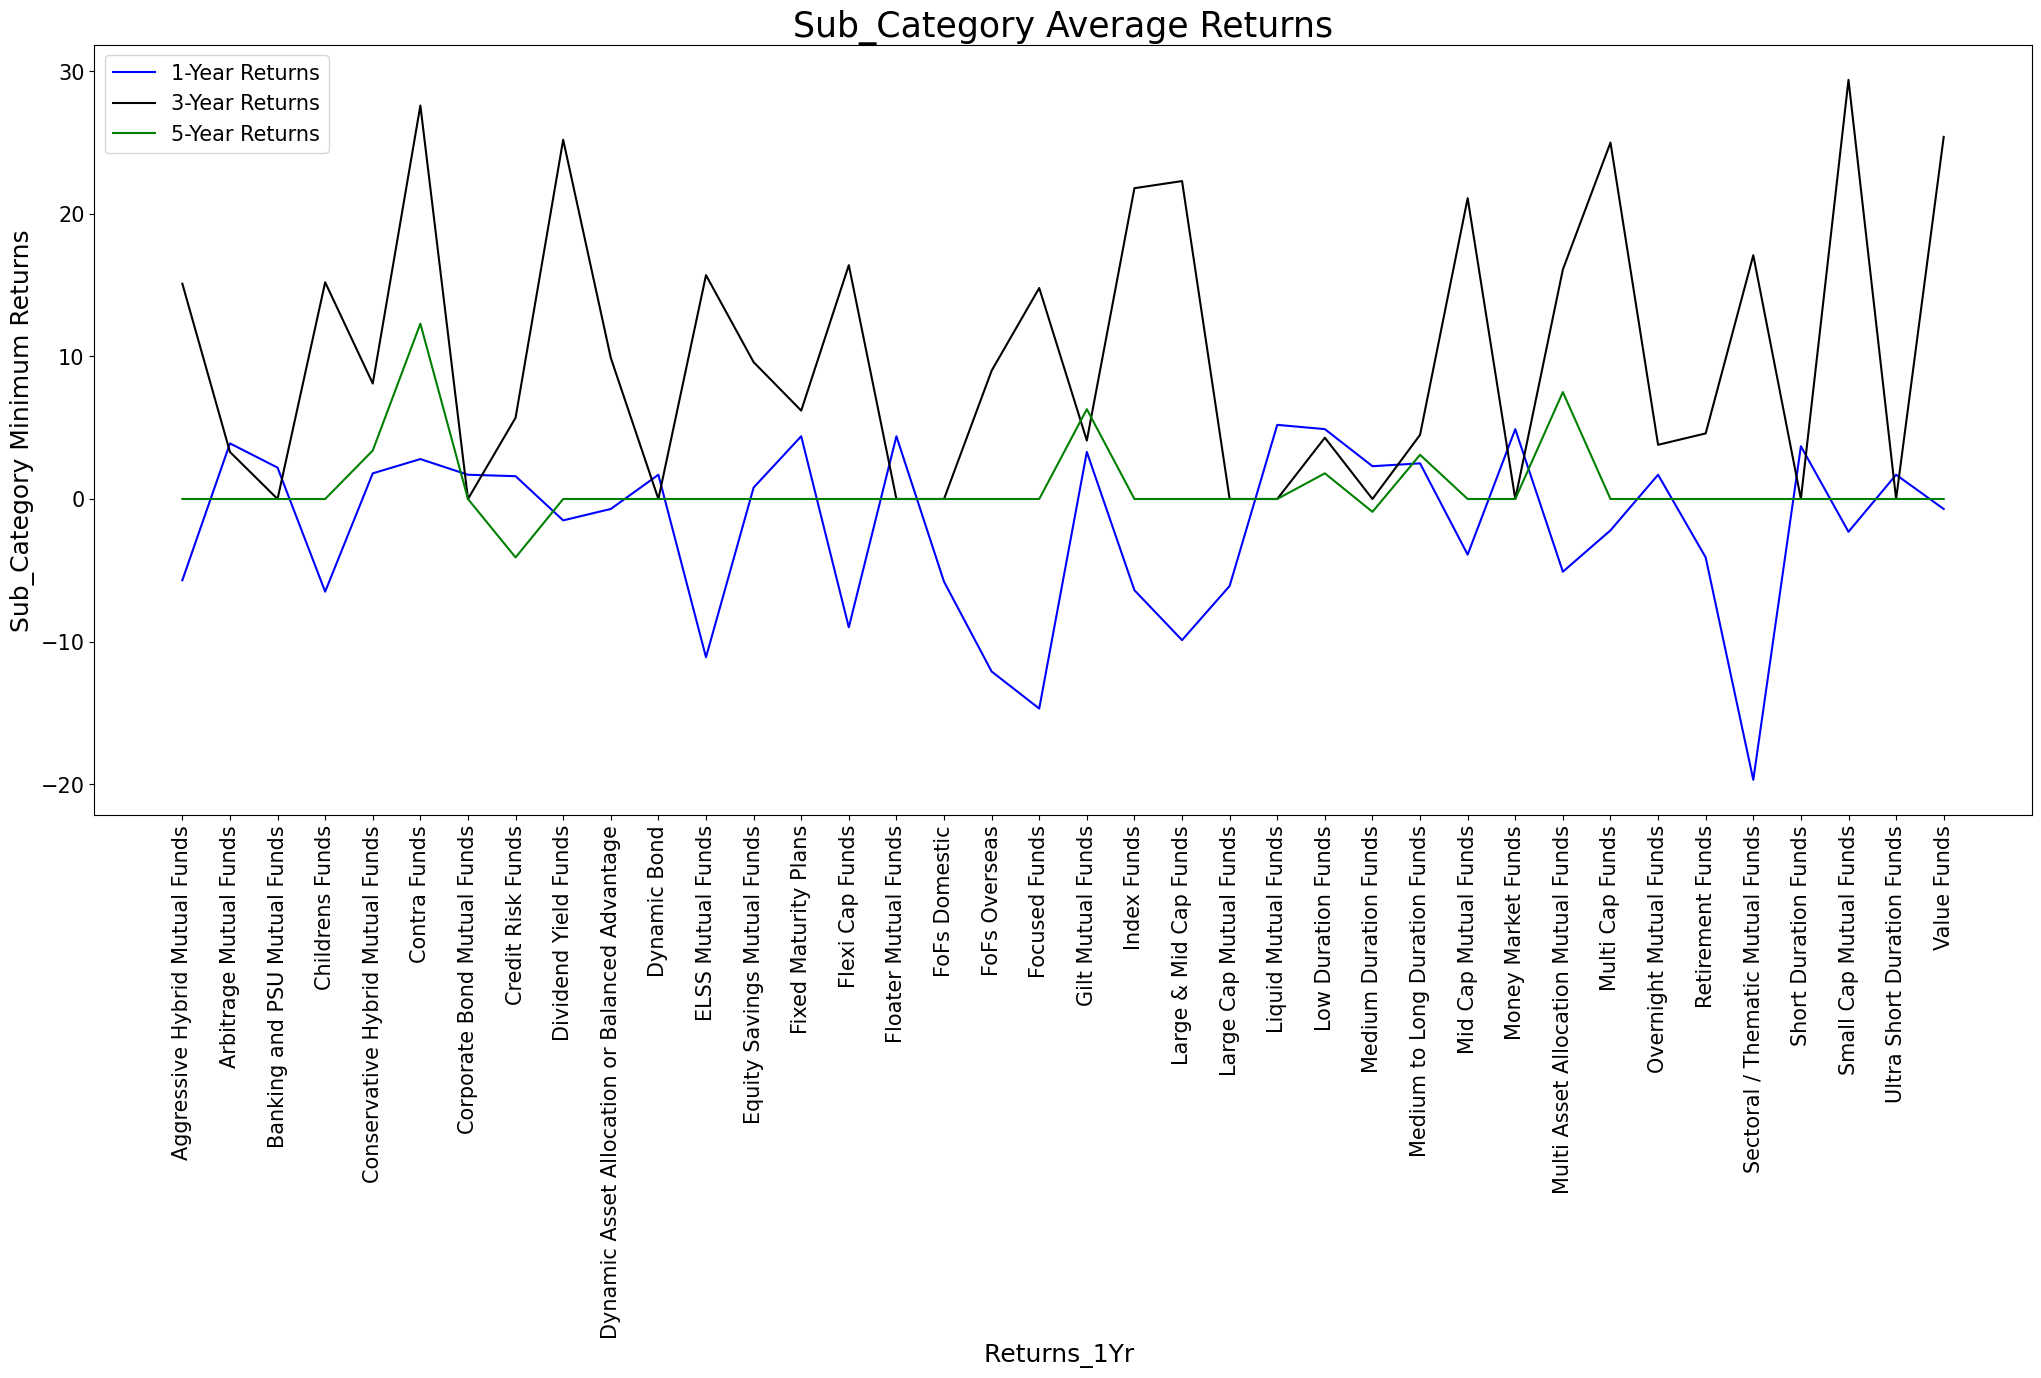

In [142]:
plt.figure(figsize=(25,10))
plt.title("Sub_Category Average Returns", fontsize=25)
plt.xlabel('Returns_1Yr ', fontsize=18)
plt.ylabel('Sub_Category Minimum Returns', fontsize=18)
plt.xticks( rotation=90, fontsize=15)
plt.yticks( fontsize=15)


sns.lineplot(x=min_year_1df.index,y=min_year_1df.values,label='1-Year Returns', color='b')
sns.lineplot(x=min_year_3df.index,y=min_year_3df.values,label='3-Year Returns', color='black')
sns.lineplot(x=min_year_5df.index,y=min_year_5df.values,label='5-Year Returns', color='g')


plt.legend(fontsize=15)

In [143]:
df.sample(2)

,Scheme_Name,Min_Sip,Min_Lumpsum,Expense_Ratio,Fund_Size_Cr,Fund_Age_Yr,Fund_Manager,Risk_Level,Amc_Name,Rating,Category,Sub_Category,Returns_1Yr,Returns_3Yr,Returns_5Yr
377,Indiabulls Liquid Fund,500,500,0.22,212.0,10,Karan Singh,2,Indiabulls Mutual Fund,1,Debt,Liquid Mutual Funds,5.4,4.0,5.2
490,Mahindra Manulife Liquid Fund,0,1000,0.15,514.0,7,Rahul Pal,3,Mahindra Manulife Mutual Fund,5,Debt,Liquid Mutual Funds,5.7,4.5,5.4
